In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
df=pd.read_table('C:\\Users\\Siddy\\Desktop\\occupancy_data\\datatraining.txt', sep=',')
df.dtypes
df.shape

(8143, 7)

In [31]:
df['date']=pd.to_datetime(df.date) #I have converted to datetime so we can use maths with datetime

In [32]:
ts=pd.to_datetime('2/2/2015')
df.reset_index(inplace=True)
del df['index']
df.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1


In [33]:
feature_cols=['Temperature', 'Humidity', 'Light', 'CO2']
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import random

In [34]:
import random
reservoir=[]
def reservoir_sample(dfo,size):
        for index, row in dfo.iterrows():
                    if index<=size:
                            reservoir.append(row)
                    elif index >= size and random.random() < size/float(index+1):
                            replace = random.randint(0,size-1)
                            reservoir[replace] = (row)
        return reservoir

In [38]:
df_test=pd.DataFrame()
max_size=len(df)
chunk_count=10
all_chunks=[]
nxt_chunks=[]
allsamples=[]
AccuScore=[]
PreScore=[]
RScore=[]
f1score=[]
i=0
j=1
chunk_size=int(round(max_size/chunk_count))
for i in range (chunk_count):
    idx_start=chunk_size*i
    idx_end=min(idx_start+chunk_size,max_size)
    nxt_idx_start=chunk_size*(i+1)
    nxt_idx_end=min(nxt_idx_start+chunk_size,max_size)
    all_chunks.append(df.iloc[idx_start:idx_end])
    nxt_chunks.append(df.iloc[nxt_idx_start:nxt_idx_end])
    df_sample=pd.DataFrame(reservoir_sample(all_chunks[i],5))
    allsamples.append(df_sample)
    df_test=nxt_chunks[i]
    print (df_sample)
    df1_train_x=df_sample[feature_cols]                           
    df1_train_y=df_sample.Occupancy
    logreg.fit(df1_train_x,df1_train_y)
    df1_test_x=df_test[feature_cols]
    df1_test_y=df_test.Occupancy
    y_pred=logreg.predict(df1_test_x)
    Ascore=metrics.accuracy_score(df1_test_y,y_pred)
    pscore=metrics.precision_score(df1_test_y,y_pred)
    rcscore=metrics.recall_score(df1_test_y,y_pred)
    fscore=metrics.f1_score(df1_test_y,y_pred)
    AccuScore.append(Ascore)
    PreScore.append(pscore)
    RScore.append(rcscore)
    f1score.append(fscore)
print('All done')


                   date  Temperature  Humidity  Light         CO2  \
68  2015-02-04 18:59:00        22.29   27.3400    0.0  611.000000   
297 2015-02-04 22:47:59        21.29   25.7000    0.0  469.500000   
769 2015-02-05 06:40:00        20.79   22.8900    0.0  450.000000   
669 2015-02-05 04:59:59        20.89   23.7900    0.0  444.500000   
477 2015-02-05 01:47:59        21.20   25.0000    0.0  442.333333   
5   2015-02-04 17:55:59        23.10   27.2000  419.0  701.000000   
0   2015-02-04 17:51:00        23.18   27.2720  426.0  721.250000   
1   2015-02-04 17:51:59        23.15   27.2675  429.5  714.000000   
2   2015-02-04 17:53:00        23.15   27.2450  426.0  713.500000   
3   2015-02-04 17:54:00        23.15   27.2000  426.0  708.250000   
4   2015-02-04 17:55:00        23.10   27.2000  426.0  704.500000   
5   2015-02-04 17:55:59        23.10   27.2000  419.0  701.000000   

     HumidityRatio  Occupancy  
68        0.004551          0  
297       0.004021          0  
769   

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


                    date  Temperature  Humidity  Light         CO2  \
1673 2015-02-05 21:43:59    20.790000   20.2900    0.0  457.000000   
2906 2015-02-06 18:16:59    21.445000   20.6000    0.0  738.500000   
3853 2015-02-07 10:04:00    21.133333   18.6000  269.0  460.666667   
669  2015-02-05 04:59:59    20.890000   23.7900    0.0  444.500000   
3623 2015-02-07 06:14:00    19.722500   19.3900    0.0  450.500000   
5    2015-02-04 17:55:59    23.100000   27.2000  419.0  701.000000   
0    2015-02-04 17:51:00    23.180000   27.2720  426.0  721.250000   
1    2015-02-04 17:51:59    23.150000   27.2675  429.5  714.000000   
2    2015-02-04 17:53:00    23.150000   27.2450  426.0  713.500000   
3    2015-02-04 17:54:00    23.150000   27.2000  426.0  708.250000   
4    2015-02-04 17:55:00    23.100000   27.2000  426.0  704.500000   
5    2015-02-04 17:55:59    23.100000   27.2000  419.0  701.000000   

      HumidityRatio  Occupancy  
1673       0.003074          0  
2906       0.003250    

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
print(AccuScore)
print(PreScore)
print(RScore)
print(f1score)
allchunkssizes=[0,814,1628,2442,3256,4070,4884,5698,6512,7326]

[0.9176904176904177, 0.9901719901719902, 0.98771498771498767, 0.68918918918918914, 0.98034398034398029, 0.90417690417690422, 1.0, 0.601965601965602, 0.99631449631449631, 1.0]
[0.89333333333333331, 0.95375722543352603, 0.97679814385150809, 0.0, 0.0, 0.0, 0.0, 0.98611111111111116, 0.94444444444444442, 1.0]
[0.99443413729128016, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.398876404494382, 1.0, 1.0]
[0.94117647058823528, 0.97633136094674555, 0.98826291079812201, 0.0, 0.0, 0.0, 0.0, 0.56799999999999995, 0.97142857142857142, 1.0]


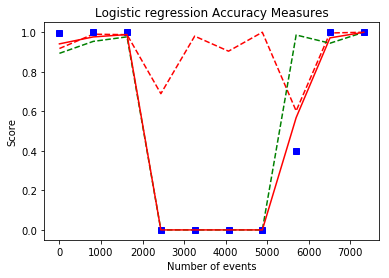

In [37]:
plt.plot(allchunkssizes,AccuScore,'r--')
plt.plot(allchunkssizes,PreScore,'g--')
plt.plot(allchunkssizes,RScore,'bs')
plt.plot(allchunkssizes,f1score,'r')
plt.title('Logistic regression Accuracy Measures')
plt.ylabel('Score')
plt.xlabel('Number of events')
plt.show()